# Caso Práctico: Tema 1 y 2.
Los economistas del Banco Central Europeo han ajustado los datos de variación de la tasa de ahorro de las familias (%$\Delta$ Tasa de ahorro) en función de la variación del PIB (%$\Delta$ PIB) y la variación del consumo de los hogares (%$\Delta$ CH) en función del tiempo $t$ en trimestres. Todas las tasas de variación son inter-trimestrales. Si consideramos, para simplificar el problema, que $x = \% \Delta PIB$ e $y = \% \Delta CH$, la ecuación a optimizar es:
$$
\% \Delta \text{Tasa de ahorro} = J = \int \left[ (1 + t^2) \cdot (\Delta PIB_t) + (\Delta CH_t) + \left( \frac{\partial \Delta PIB_t}{\partial t} \right)^2 + \left( \frac{\partial \Delta CH_t}{\partial t} \right)^3 \right] \, dt
$$
$$
\% \Delta \text{Tasa de ahorro} = J = \int \left[ (1 + t^2) \cdot x(t) + y(t) + \left( \frac{\partial x(t)}{\partial t} \right)^2 + \left( \frac{\partial y(t)}{\partial t} \right)^3 \right] \, dt
$$
**Problema:**

1. Mediante el cálculo de variaciones, calcular las curvas óptimas de PIB y de consumo de los hogares ($CH$) en función de $t$ (en función de las constantes de integración), que optimizan el problema.

2. Se ha establecido para la simulación que para $t = 0.5$ la tasa de variación del PIB y del consumo de los hogares es del 0.5\%. De igual modo, para $t = 1$ las tasas de variación del PIB y del consumo de los hogares son del 1\%. Calcular las curvas óptimas bajo estas condiciones de contorno. Dibujar las curvas. **Nota: se aconseja usar métodos numéricos, especialmente el método de Newton-Raphson.**

3. Los economistas necesitan saber si existe un punto $t^*$ que iguale las curvas de optimización. Demostrar si existe este punto desde un punto de vista gráfico dentro de los intervalos de $t$ de 0 a 2. ¿Qué significado económico podemos concluir tras este análisis?
    
4. Aplicando la distancia por diferencias (diferencia entre los valores de $x^*$ e $y^*$), calcular el punto $t^*$ que minimice dicha distancia entre las curvas. Razonar la respuesta e indicar cómo usar este parámetro desde un punto de vista económico. **Nota: se aconseja usar métodos numéricos, especialmente el método de Newton-Raphson.**

Las nuevas políticas fiscales establecidas por la UE y la incertidumbre de cómo impactarán los conflictos en Oriente Medio y la guerra de Ucrania en la economía de la UE, hace necesario establecer una función de control de cada una de las variables en función del incremento de la inflación ($u(t)$ y $v(t)$). En este sentido, se establecen dos funciones de control:
$$
\frac{\partial \Delta PIB_t}{\partial t} = u(t) \quad \rightarrow \quad \frac{\partial \Delta CH_t}{\partial t} = v(t)
$$
Aplicando técnicas de control óptimo, el equipo económico necesita conocer las curvas
optimizadas de la función $J$, así como las funciones $u$ y $v$ optimizadas en función de $t$.
En este caso, dejar la solución en función de las constantes de integración.

Dado el caso de uso, enumeras tres conclusiones desde el punto de vista economico y matematico. 

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

## Apartado 1. Cálculo de las curvas óptimas.
Para el cálculo de las curvas óptimas del PIB y CH en función de $t$, utilizaremos el cálculo de variaciones.

Debemos resolverlo mediante la ecuación de Euler-Lagrange. Esta permite encontrar las funcines que maximicen o minimicen un funcional dado. En nuestro caso habría que aplicarlo a cada variable que haya, únicamente a $x$ e $y$.

### Ecuación de Euler-Lagrange.
Primero debemos de definir una función que permita la resolución de las ecuación de Euler-Lagrange. Como parámetros hemos puesto los siguientes: la función, variables dependiente de $t$, variable independiente $t$.

In [2]:
def euler_lagrange(F, y, t):
    y_prime = sp.diff(y, t)  # Derivada de y respecto a t

    # SIMPLIFICACIONES:
    if not F.has(y):
        euler_eq = sp.Eq(sp.diff(F, y_prime), sp.Symbol('C'))
        return sp.dsolve(euler_eq, y)
    if not F.has(t):
        eq = F - y_prime * sp.diff(F, y_prime)
        euler_eq = sp.Eq(eq, sp.Symbol('C'))
        return sp.dsolve(euler_eq, y)

    dF_dy = sp.diff(F, y)
    dF_dy_prime = sp.diff(F, y_prime)
    euler_eq = sp.simplify(dF_dy - sp.diff(dF_dy_prime, t))
    return sp.dsolve(euler_eq, y)

### Euler-Lagrange para $x$.
Primero debemos de definir las variables: dependientes e independientes. Tras ello definir el funcional como una variable F. Posteriormente ejecutaremos la función que permite la resolución de Euler-Lagrange.

In [3]:
t = sp.symbols('t')
x = sp.Function('x')(t)
y = sp.Function('y')(t)
F = (1 + t**2)*x + y + sp.diff(x, t)**2 + sp.diff(y, t)**3

In [4]:
x_opt = euler_lagrange(F, x, t)

In [5]:
x_opt

Eq(x(t), C1 + C2*t + t**4/24 + t**2/4)

**Solución.**
La solución para $x$ optimizada, que representa el PIB, es:

$$
x^* = \frac{1}{24}t^4 + \frac{1}{4}t^2 + C \cdot t + C_1
$$

### Euler-Lagrange para $y$.
Primero debemos de definir las variables: dependientes e independientes. Tras ello definir el funcional como una variable F. Posteriormente ejecutaremos la función que permite la resolución de Euler-Lagrange.

In [6]:
y_opt = euler_lagrange(F, y, t)

In [7]:
sp.pprint(y_opt)

⎡                        3/2                          3/2⎤
⎢            2⋅(C₂ + 3⋅t)                 2⋅(C₂ + 3⋅t)   ⎥
⎢y(t) = C₁ - ───────────────, y(t) = C₁ + ───────────────⎥
⎣                   27                           27      ⎦


**Solución.**
La solución para $y$ optimizada, que representa el CH, es:
$$
(y + C_2)^2 = (\frac{\sqrt[3]{4}}{3}t + C_3)^3
$$

## Apartado 2. Cálculo de las curvas óptimas dadas condiciones de contorno.

### Cálculo de constantes para $x$.

In [8]:
C1, C2 = sp.symbols('C1 C2')

x_opt = x_opt.rhs

# Condiciones iniciales
eq1 = sp.Eq(x_opt.subs(t, 0.5), 0.5)  # x(0.5) = 0.5
eq2 = sp.Eq(x_opt.subs(t, 1), 1)       # x(1) = 1

# Resolver el sistema de ecuaciones para C1 y C2
solution = sp.solve((eq1, eq2), (C1, C2))

# Mostrar los resultados
print("Soluciones para C1 y C2:", solution)


Soluciones para C1 y C2: {C1: 0.161458333333333, C2: 0.546875000000000}


In [9]:
x_opt_final = x_opt.subs(solution)

In [10]:
x_opt_final

t**4/24 + t**2/4 + 0.546875*t + 0.161458333333333

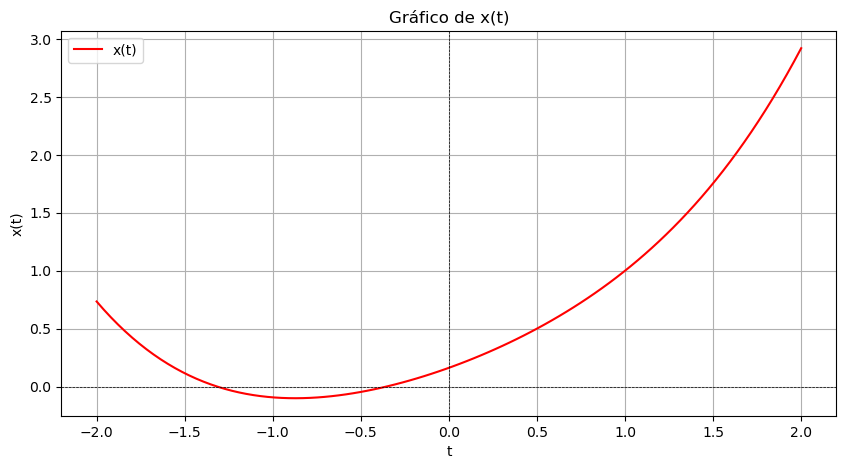

In [11]:
x_func = sp.lambdify(t, x_opt_final, 'numpy') # Definir una función para evaluar x(t)

t_values = np.linspace(-2, 2, 100)
x_values = x_func(t_values)
plt.figure(figsize=(10, 5))
plt.plot(t_values, x_values, label='x(t)', color='red')
plt.title('Gráfico de x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

### Cálculo de constantes para $y$.

#### Opción 1: Resolución del sistema.

In [12]:
C1, C2 = sp.symbols('C1 C2')

y_opt = y_opt[1].rhs

# Condiciones iniciales
eq1 = sp.Eq(y_opt.subs(t, 0.5), 0.5)  # x(0.5) = 0.5
eq2 = sp.Eq(y_opt.subs(t, 1), 1)       # x(1) = 1

# Resolver el sistema de ecuaciones para C1 y C2
solution = sp.solve((eq1, eq2), (C1, C2))

# Mostrar los resultados
print("Soluciones para C1 y C2:", solution)

Soluciones para C1 y C2: [(-1.25694645694058, 6.75521135266091)]


In [13]:
solution_dict = {C1: solution[0][0], C2: solution[0][1]}

In [14]:
y_opt_final = y_opt.subs(solution_dict)

In [15]:
y_opt_final

1.30054278393664*(0.444101574826121*t + 1)**(3/2) - 1.25694645694058

#### Opción 2: A través de Newton Raphson.
El **método de Newton-Raphson** se implementa en la carpeta `newton_raphson`. Al ejecutar el script principal, los resultados obtenidos son equivalentes a los del método anterior, pero con una diferencia significativa en el tiempo de cálculo.

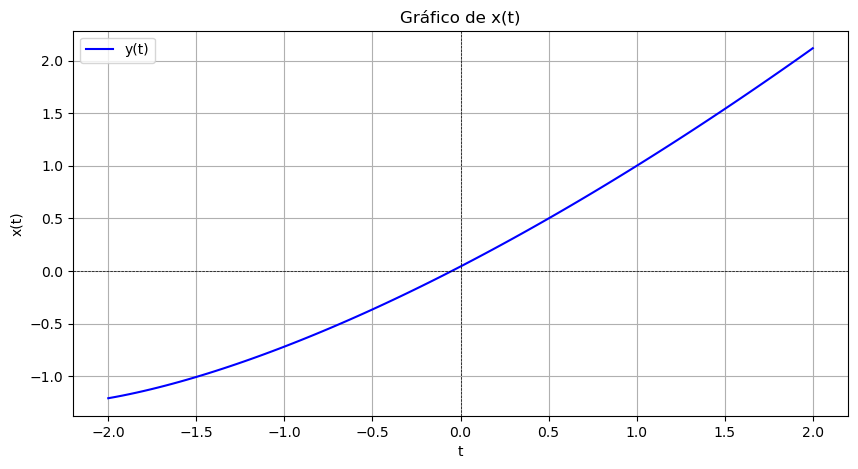

In [16]:
y_func = sp.lambdify(t, y_opt_final, 'numpy') # Definir una función para evaluar x(t)

t_values = np.linspace(-2, 2, 100)
y_values = y_func(t_values)
plt.figure(figsize=(10, 5))
plt.plot(t_values, y_values, label='y(t)', color='blue')
plt.title('Gráfico de x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

## Apartado 3. Igualación de las curvas de optimización.

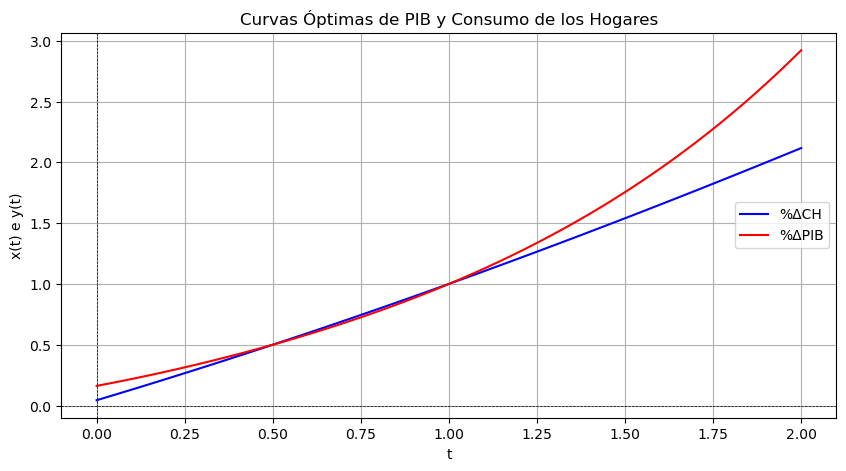

In [17]:
t_values = np.linspace(0, 2, 100)

# Calcular los valores correspondientes de x y y
x_values = x_func(t_values)
y_values = y_func(t_values)

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(t_values, y_values, label='%ΔCH', color='blue')
plt.plot(t_values, x_values, label='%ΔPIB', color='red')
plt.title('Curvas Óptimas de PIB y Consumo de los Hogares')
plt.xlabel('t')
plt.ylabel('x(t) e y(t)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

In [18]:
equation = sp.Eq(x_opt_final, y_opt_final)

In [19]:
solution_t = sp.solve(equation, t)

In [20]:
solution_t

[]

## Apartado 4. Función distancia entre $x^*$ e $y^*$.

In [21]:
d = x_opt_final + y_opt_final

In [22]:
d

t**4/24 + t**2/4 + 0.546875*t + 1.30054278393664*(0.444101574826121*t + 1)**(3/2) - 1.09548812360725